<a href="https://colab.research.google.com/github/adeoluafo/FDSDE_AAfolabi/blob/main/HW5/AdeoluwaAfolabi_logistic_regression_instuctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
bank = pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/bank_term_deposit.csv")

# Task 1: general data exploration

In [15]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        1042 non-null   int64 
 1   job        1042 non-null   object
 2   marital    1042 non-null   object
 3   education  1042 non-null   object
 4   default    1042 non-null   object
 5   balance    1042 non-null   int64 
 6   housing    1042 non-null   object
 7   loan       1042 non-null   object
 8   contact    1042 non-null   object
 9   day        1042 non-null   int64 
 10  month      1042 non-null   object
 11  duration   1042 non-null   int64 
 12  campaign   1042 non-null   int64 
 13  pdays      1042 non-null   int64 
 14  previous   1042 non-null   int64 
 15  poutcome   1042 non-null   object
 16  y          1042 non-null   object
dtypes: int64(7), object(10)
memory usage: 138.5+ KB


In [16]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,38,blue-collar,married,secondary,no,1663,yes,no,cellular,13,apr,217,3,327,1,failure,no
1,38,blue-collar,divorced,secondary,no,595,yes,no,cellular,7,may,245,3,-1,0,unknown,no
2,34,blue-collar,married,secondary,no,360,yes,no,telephone,19,nov,46,1,182,2,failure,no
3,60,admin.,married,secondary,no,1025,no,no,cellular,6,aug,388,8,-1,0,unknown,no
4,42,management,married,tertiary,no,520,no,no,cellular,4,nov,158,1,-1,0,unknown,no


In [17]:
bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1037,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
1038,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
1039,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
1040,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
1041,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes


# Task 2: Preprocess the target variable (binary)

In [18]:
bank["y"].unique()

array(['no', 'yes'], dtype=object)

In [19]:
bank["y"].value_counts()

,count
y,
no,521
yes,521


**there is a really good news here: the data is evenly split between the two outcomes: its "balanced"**

## all variables need to be transformed into numeric values: for the binary target: 0/1

In [20]:
target = (bank["y"] == "yes").astype(int)

In [21]:
target

,y
0,0
1,0
2,0
3,0
4,0
...,...
1037,1
1038,1
1039,1
1040,1


# Task 3: Preprocess the other variables

In [22]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## choose four features to use as input

In [23]:
cols = ["age", "balance", "duration", "marital"]
features = bank[cols]

In [24]:
features

,age,balance,duration,marital
0,38,1663,217,married
1,38,595,245,divorced
2,34,360,46,married
3,60,1025,388,married
4,42,520,158,married
...,...,...,...,...
1037,26,668,576,single
1038,60,362,816,married
1039,42,1080,951,single
1040,32,620,1234,single


In [25]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       1042 non-null   int64 
 1   balance   1042 non-null   int64 
 2   duration  1042 non-null   int64 
 3   marital   1042 non-null   object
dtypes: int64(3), object(1)
memory usage: 32.7+ KB


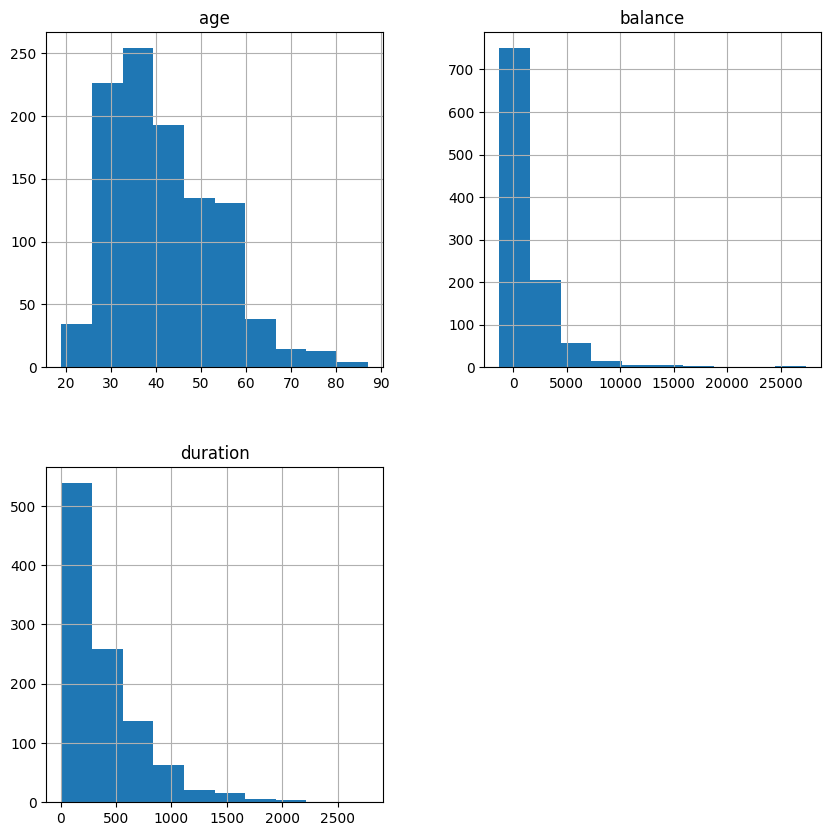

In [26]:
features.hist(figsize=(10,10));

#TODO 1: Write a caption for Fig 1

the figure above illustrates the distribution of three numerical features: age, balance, and duration. The age histogram shows that most account holders are between 20 and 70 years old, with a peak concentration between 30 and 40. The balance histogram indicates that the majority of customers have balances below 5000, with few having significantly higher amounts. The duration histogram, reflecting customer contact time in seconds, reveals that most interactions lasted between 0 and 1000 seconds, with only a small number exceeding this duration.





## Task 3a: preprocess numerical features

# Min-Max Normalization:
 make the features comparable by changing their range to 0-1

(array - min(array)) / (max(array) - min(array)) = (array - min(array)) / range(array)

In [27]:
numcols = features.select_dtypes("number").columns
feature_ranges = features[numcols].max() - features[numcols].min()

features[numcols] = (features[numcols]  - features[numcols].min()) / feature_ranges
features.describe()

<ipython-input-27-01d2c2609cc5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numcols] = (features[numcols]  - features[numcols].min()) / feature_ranges


,age,balance,duration
count,1042.000000,1042.000000,1042.000000
mean,0.333917,0.095778,0.139462
std,0.171534,0.088366,0.127122
min,0.000000,0.000000,0.000000
25%,0.205882,0.049008,0.053242
50%,0.308824,0.065088,0.096704
75%,0.441176,0.108654,0.187613
max,1.000000,1.000000,1.000000


notice: min is 0 max is 1 for all features, but the histograms will have the same shape!

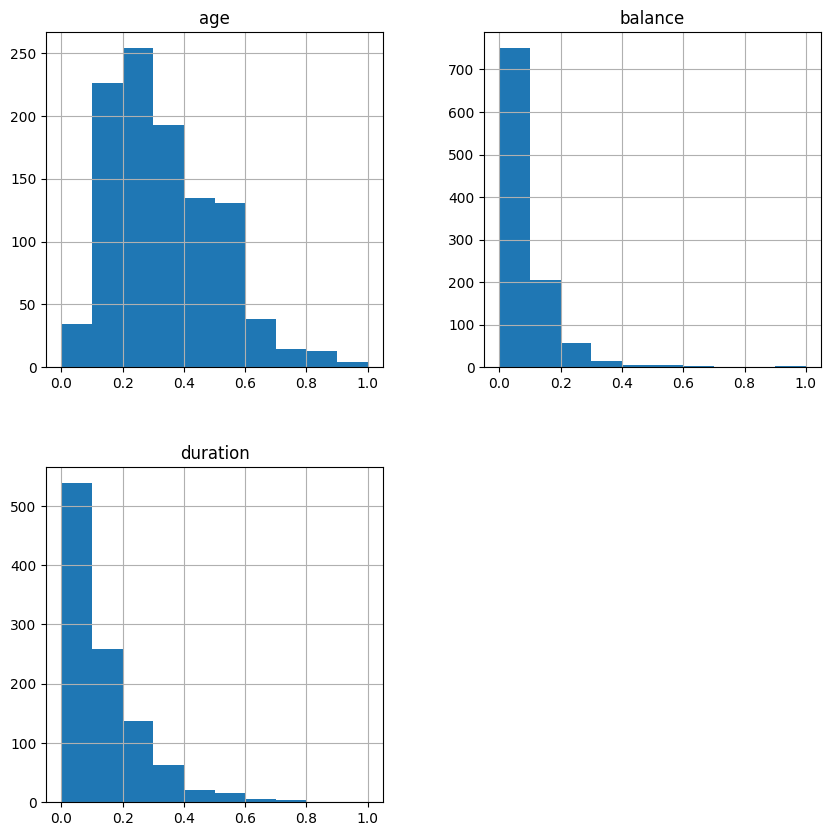

In [28]:
features.hist(figsize=(10,10));

#TODO 2:  write a caption here for fig 2
These histograms depict the normalized distribution of the numerical features (age, balance, duration) in the dataset, scaled between 0 and 1. Despite normalization, the overall shapes of the graphs mirror those of the original histograms. The age feature shows a concentration of values between 0.2 and 0.6, corresponding to ages 20 to 70. The balance feature remains heavily skewed, with most values between 0 and 0.2, indicating that the majority of balances are below 5000. Similarly, the duration feature is skewed, with most contact durations falling between 0 and 0.4, which corresponds to 0 to 1000 seconds in the original scale.

## Task 3b: preprocess categorical features

### One-Hot Encoding
 each category within a multliclass categorical values gets turned into a binary column

In [29]:
features["marital"].unique() # three possible values

array(['married', 'divorced', 'single'], dtype=object)

In [30]:
#notice: we will name each category by the martial_ root and each value
pd.get_dummies(features['marital'], prefix='marital')

,marital_divorced,marital_married,marital_single
0,False,True,False
1,True,False,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1037,False,False,True
1038,False,True,False
1039,False,False,True
1040,False,False,True


join the categorical features to the binary one-hot-encoded features derived from `martial`

In [31]:
# notice: you need to drop the original martial column
features.join(pd.get_dummies(features['marital'], prefix='marital')).drop(columns=['marital'])

,age,balance,duration,marital_divorced,marital_married,marital_single
0,0.279412,0.103701,0.075697,False,True,False
1,0.279412,0.066448,0.085838,True,False,False
2,0.220588,0.058251,0.013763,False,True,False
3,0.602941,0.081447,0.137631,False,True,False
4,0.338235,0.063832,0.054328,False,True,False
...,...,...,...,...,...,...
1037,0.102941,0.068994,0.205723,False,False,True
1038,0.602941,0.058321,0.292648,False,True,False
1039,0.338235,0.083365,0.341543,False,False,True
1040,0.191176,0.067320,0.444042,False,False,True


# TODO 3: describe what each feature in the dataframe represents (use the descriptions in the intro)
age: This is a normalized numeric value that represents the age of the bank client. In the original dataset, age is a key feature for customer demographics.

balance: A normalized numeric value representing the average account balance (in euros) of the client. In the original data, this feature is indicative of the client’s financial standing with the bank.

duration: This is a normalized numeric value that indicates the duration of the last phone call made to the client in seconds. As mentioned, this variable is critical, as it directly impacts the likelihood of a successful subscription. However, it's typically used for benchmarking and not for realistic predictive models, as the duration of a call isn't known beforehand.

marital_divorced: A boolean value that represents whether the client is divorced. In the original data, this is part of the 'marital' categorical feature, which contains multiple classes such as 'divorced', 'married', and 'single'.

marital_married: A boolean value indicating whether the client is married. It's one of the categories extracted from the original 'marital' feature.

marital_single: A boolean value that shows if the client is single. It’s another category from the original 'marital' feature. In this transformed form, the marital status has been one-hot encoded into separate boolean columns (divorced, married, and single).

In [32]:
features = features.join(pd.get_dummies(features['marital'], prefix='marital')).drop(columns=['marital'])

In [33]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1042 non-null   float64
 1   balance           1042 non-null   float64
 2   duration          1042 non-null   float64
 3   marital_divorced  1042 non-null   bool   
 4   marital_married   1042 non-null   bool   
 5   marital_single    1042 non-null   bool   
dtypes: bool(3), float64(3)
memory usage: 27.6 KB


#Task 4: Model: Logistic Regression

In [34]:
#choose the model
from sklearn.linear_model import LogisticRegression

# TODO 4: make and fit a logistic regression to the problenm

In [35]:
# -- initialize the model
model = LogisticRegression()

In [41]:
# fit the model to the data
logreg = model.fit(features, target)
logreg

LogisticRegression()

In [37]:
# coefficients for each input variable (there should be 6)
logreg.coef_

array([[ 1.28349319,  0.87606627,  7.25975571,  0.02985416, -0.32687214,
         0.29408336]])

In [38]:
# one single intercept
logreg.intercept_

array([-1.34980463])

In [39]:
# predictions of the model
prediction = logreg.predict(features)
prediction

array([0, 0, 0, ..., 1, 1, 1])


# TODO 5: Model Evaluation


In [48]:
# accuracy: number of correct predictions over total number of predictions
# define correct predictions as prediction == target
Correctprediction = (prediction == target)
# count the numbers - there are many ways to do that but summing over a boolean array resulting from  (prediction == target) would do
# divide by the total number of observations
accuracy = Correctprediction.sum() / len(target)
#print("model accuracy: {:.2f}".features( COMPLETE THE CODE))
print("model accuracy: {:.2f}".format(accuracy))


model accuracy: 0.72


In [43]:
# -- metrics
from sklearn.metrics import classification_report
print(classification_report(target, prediction))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       521
           1       0.78      0.63      0.69       521

    accuracy                           0.72      1042
   macro avg       0.73      0.72      0.72      1042
weighted avg       0.73      0.72      0.72      1042



In [44]:
target_names = ["No Buy", "Buy"]
print(classification_report(target, prediction, target_names=target_names))

              precision    recall  f1-score   support

      No Buy       0.69      0.82      0.75       521
         Buy       0.78      0.63      0.69       521

    accuracy                           0.72      1042
   macro avg       0.73      0.72      0.72      1042
weighted avg       0.73      0.72      0.72      1042



# TODO 6: write a table caption: using the slides describe what each quantity above describes**
This report assesses the performance of the logistic regression model in predicting client subscriptions to a term deposit product. The evaluation includes various metrics that indicate the model's effectiveness.

Precision reflects the proportion of clients predicted to subscribe who actually did, with values of 0.69 for "No Buy" and 0.78 for "Buy." This shows the reliability of the model's positive predictions.

Recall measures the model's ability to correctly identify actual subscribers, yielding results of 0.82 for "No Buy" and 0.63 for "Buy." This indicates the model's effectiveness in capturing all relevant cases.

The F1-score, which balances precision and recall, stands at 0.75 for "No Buy" and 0.69 for "Buy." This metric is particularly useful given the uneven distribution of classes. The support for both categories is 521 instances, providing context for the model's performance. Overall, the model achieved an accuracy of 0.72, meaning that 72% of the predictions made by the model were correct.

Macro Average and Weighted Average metrics further enhance the understanding of the model's performance. The macro average treats all classes equally, while the weighted average accounts for the number of samples in each class, ensuring that larger classes have more influence on the overall evaluation. Together, these metrics offer a comprehensive view of the model's effectiveness in predicting client subscriptions to the term deposit product.



In [45]:
# -- confusion matrics
from sklearn.metrics import confusion_matrix

confusion_matrix(target, prediction)

array([[426,  95],
       [193, 328]])

In [46]:
cnf_matrix = confusion_matrix(target, prediction)

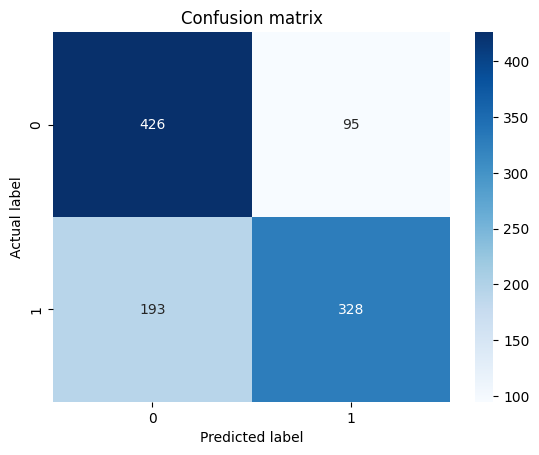

In [47]:
import seaborn as sns
import pylab as plt

sns.heatmap(cnf_matrix, annot=True, cmap="Blues", fmt='d');
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

#  TODO 7: write a descriptive caption for the plot above
The heatmap provides a clear visual representation of the model's performance. The large number of true negatives (426) and true positives (328) indicates that the model is fairly accurate at predicting both outcomes. However, the presence of 193 false negatives suggests that the model occasionally struggles to identify clients who will subscribe, while the 95 false positives indicate some overprediction of subscriptions. Overall, the confusion matrix shows that while the model performs well, there is room for improvement in reducing false negatives and false positives for more accurate predictions.